In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
pokeman = pd.read_csv('pokemon.csv')
print(pokeman.shape)
pokeman.head(5)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


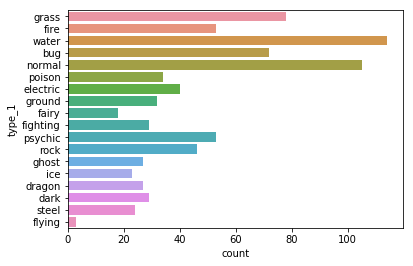

In [17]:
sb.countplot(data=pokeman, y='type_1')

In [8]:
base_color = sb.color_palette()[1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

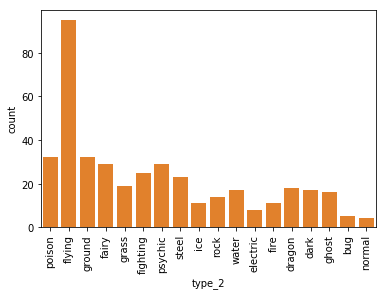

In [18]:
sb.countplot(data=pokeman, x='type_2', color=base_color)
plt.xticks(rotation=90)

Text(0,0.5,'proportion')

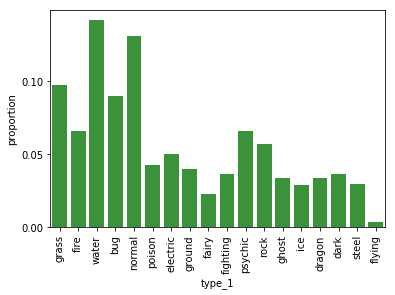

In [21]:
# Absolute vs. Relative Frequency
# By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts
#One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the counts axis in terms of proportions. 
n_points = pokeman.shape[0]

max_count = pokeman['type_1'].value_counts().max()
max_prop = max_count / n_points
# generate tick mark location and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[2]
sb.countplot(data=pokeman, x='type_1', color=base_color)
plt.xticks(rotation=90)
plt.yticks(tick_props*n_points, tick_names)
plt.ylabel('proportion')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

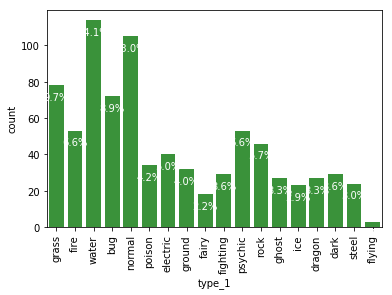

In [23]:
# Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead

base_color = sb.color_palette()[2]
sb.countplot(data=pokeman, x='type_1', color=base_color)
n_points = pokeman.shape[0]
type_counts = pokeman['type_1'].value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='w')
plt.xticks(rotation=90)

## Counting missing Data

In [25]:
df = pd.read_csv('pokemon.csv')
df.head(5)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

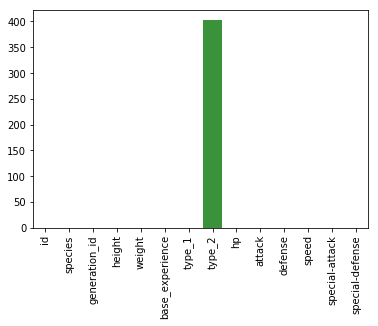

In [31]:
na_counts = df.isna().sum()
base_color = sb.color_palette()[2]
sb.barplot(na_counts.index.values, na_counts, color=base_color)
plt.xticks(rotation=90)